In [1]:
#Free Cash Flow
def calculate_fcf(operating_cash_flow, capex):
    """Calculate Free Cash Flow (FCF) from Operating Cash Flow and CapEx."""
    return operating_cash_flow - capex

# Example
operating_cash_flow = 500_000_000  # $500M
capex = 200_000_000                # $200M
fcf = calculate_fcf(operating_cash_flow, capex)
print(f"Free Cash Flow (FCF): ${fcf/1e6}M")  # Output: $300M



def fcf_analysis(operating_cash_flow, capex, revenue, market_cap):
    fcf = operating_cash_flow - capex
    fcf_yield = (fcf / market_cap) * 100  # As a percentage
    fcf_margin = (fcf / revenue) * 100
    return fcf, fcf_yield, fcf_margin

# Example: Apple (2023)
apple_fcf, apple_yield, apple_margin = fcf_analysis(
    operating_cash_flow=110e9, capex=10e9, revenue=394e9, market_cap=2.8e12
)

print(f"Apple FCF: ${apple_fcf/1e9}B")              # $100B
print(f"FCF Yield: {apple_yield:.2f}%")            # 3.57%
print(f"FCF Margin: {apple_margin:.2f}%")          # 25.38%

Free Cash Flow (FCF): $300.0M
Apple FCF: $100.0B
FCF Yield: 3.57%
FCF Margin: 25.38%


=== Key Forecast Drivers ===
volume_growth: Unit sales growth % (Current: 0.05, Range: (0.01, 0.15))
price_increase: Annual price increase % (Current: 0.02, Range: (-0.03, 0.05))
cogs_pct: COGS as % of revenue (Current: 0.6, Range: (0.55, 0.65))
opex_pct: Operating expenses % (Current: 0.25, Range: (0.2, 0.3))
dso: Days Sales Outstanding (Current: 45, Range: (30, 60))
inventory_turnover: Inventory turns per year (Current: 8, Range: (6, 10))
capex_pct: CapEx as % of revenue (Current: 0.08, Range: (0.05, 0.12))

=== Base Case Forecast ===
   Year  Revenue    COGS  EBITDA    FCF  AR_Days
0     1  1071.00  642.60  160.65  74.97   132.04
1     2  1147.04  688.22  172.06  80.29   141.42
2     3  1228.48  737.09  184.27  85.99   151.46
3     4  1315.70  789.42  197.36  92.10   162.21
4     5  1409.12  845.47  211.37  98.64   173.73

=== Volume Growth Sensitivity ===
   volume_growth  Year_5_FCF
0           0.01       81.23
1           0.04       96.31
2           0.08      113.56
3           

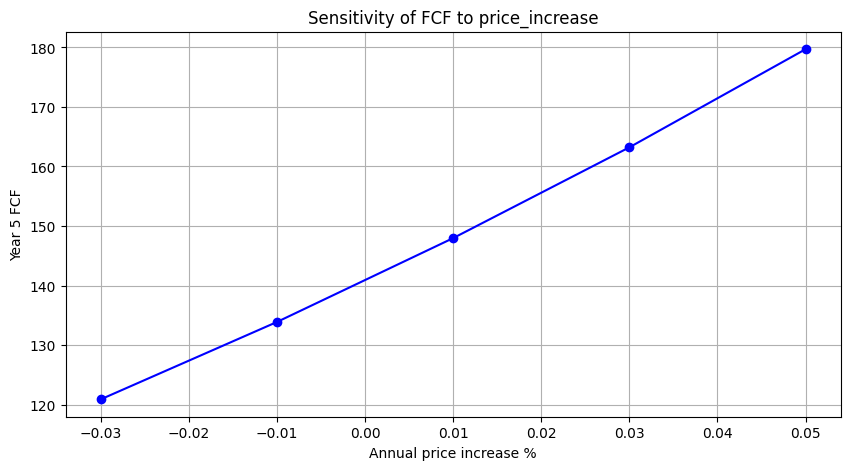

In [2]:
#Forecast Drivers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ForecastDriverAnalyzer:
    def __init__(self, company_data):
        """
        Initialize with company financial data.
        Format: {'revenue': 1000, 'cogs_pct': 0.6, 'opex_pct': 0.25, ...}
        """
        self.data = company_data
        self.drivers = self.identify_drivers()
        
    def identify_drivers(self):
        """Identify key forecast drivers based on industry best practices"""
        drivers = {
            # Revenue Drivers
            'volume_growth': {'description': 'Unit sales growth %', 'value': 0.05, 'range': (0.01, 0.15)},
            'price_increase': {'description': 'Annual price increase %', 'value': 0.02, 'range': (-0.03, 0.05)},
            
            # Cost Drivers
            'cogs_pct': {'description': 'COGS as % of revenue', 'value': self.data.get('cogs_pct', 0.6), 'range': (0.55, 0.65)},
            'opex_pct': {'description': 'Operating expenses %', 'value': self.data.get('opex_pct', 0.25), 'range': (0.2, 0.3)},
            
            # Working Capital Drivers
            'dso': {'description': 'Days Sales Outstanding', 'value': 45, 'range': (30, 60)},
            'inventory_turnover': {'description': 'Inventory turns per year', 'value': 8, 'range': (6, 10)},
            
            # CapEx Drivers
            'capex_pct': {'description': 'CapEx as % of revenue', 'value': 0.08, 'range': (0.05, 0.12)}
        }
        return drivers
    
    def calculate_forecast(self, years=5):
        """Project financials based on current driver values"""
        projections = []
        current_revenue = self.data['revenue']
        
        for year in range(1, years+1):
            # Calculate revenue
            volume_growth = self.drivers['volume_growth']['value']
            price_increase = self.drivers['price_increase']['value']
            revenue = current_revenue * (1 + volume_growth) * (1 + price_increase)
            
            # Calculate costs
            cogs = revenue * self.drivers['cogs_pct']['value']
            opex = revenue * self.drivers['opex_pct']['value']
            ebitda = revenue - cogs - opex
            
            # Calculate working capital needs
            dso = self.drivers['dso']['value']
            ar_days = dso / 365 * revenue  # Accounts receivable
            
            # Calculate CapEx and FCF
            capex = revenue * self.drivers['capex_pct']['value']
            fcf = ebitda - capex
            
            projections.append({
                'Year': year,
                'Revenue': revenue,
                'COGS': cogs,
                'EBITDA': ebitda,
                'FCF': fcf,
                'AR_Days': ar_days
            })
            
            current_revenue = revenue
            
        return pd.DataFrame(projections)
    
    def sensitivity_analysis(self, driver_name, n_points=5):
        """Analyze how changing one driver affects FCF"""
        driver = self.drivers[driver_name]
        values = np.linspace(driver['range'][0], driver['range'][1], n_points)
        results = []
        
        for val in values:
            self.drivers[driver_name]['value'] = val
            forecast = self.calculate_forecast()
            final_fcf = forecast.iloc[-1]['FCF']
            results.append((val, final_fcf))
            
        # Reset to original value
        self.drivers[driver_name]['value'] = driver['value']
        
        return pd.DataFrame(results, columns=[driver_name, 'Year_5_FCF'])
    
    def plot_sensitivity(self, driver_name):
        """Visualize driver impact on FCF"""
        sa = self.sensitivity_analysis(driver_name)
        plt.figure(figsize=(10, 5))
        plt.plot(sa[driver_name], sa['Year_5_FCF'], 'bo-')
        plt.title(f'Sensitivity of FCF to {driver_name}')
        plt.xlabel(self.drivers[driver_name]['description'])
        plt.ylabel('Year 5 FCF')
        plt.grid(True)
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Sample company data (e.g., a manufacturing firm)
    company_data = {
        'revenue': 1000,  # $1,000 million base revenue
        'cogs_pct': 0.6,  # 60% COGS margin
        'opex_pct': 0.25  # 25% operating expenses
    }
    
    analyzer = ForecastDriverAnalyzer(company_data)
    
    # 1. Show identified drivers
    print("=== Key Forecast Drivers ===")
    for name, data in analyzer.drivers.items():
        print(f"{name}: {data['description']} (Current: {data['value']}, Range: {data['range']})")
    
    # 2. Calculate 5-year forecast
    print("\n=== Base Case Forecast ===")
    forecast = analyzer.calculate_forecast()
    print(forecast.round(2))
    
    # 3. Run sensitivity on volume growth
    print("\n=== Volume Growth Sensitivity ===")
    volume_sensitivity = analyzer.sensitivity_analysis('volume_growth')
    print(volume_sensitivity.round(2))
    
    # 4. Plot price increase impact
    analyzer.plot_sensitivity('price_increase')

Financial Projections with FCF Calculation:
   Year  Revenue   Costs  Depreciation  Capital_Expenditures  \
0     1  1048.73  614.81        101.04                 84.73   
1     2  1130.04  628.18        104.01                 90.26   
2     3  1205.30  657.06        106.78                 97.14   
3     4  1277.54  682.05        108.30                104.10   
4     5  1325.83  710.18        109.78                110.82   

   Net_Working_Capital  Tax_Rate  Change_NWC     FCF  
0               151.59      0.25        0.00  265.97  
1               149.61      0.25       -1.97  314.12  
2               148.81      0.25       -0.81  341.54  
3               148.56      0.25       -0.25  369.85  
4               148.97      0.25        0.42  377.95  


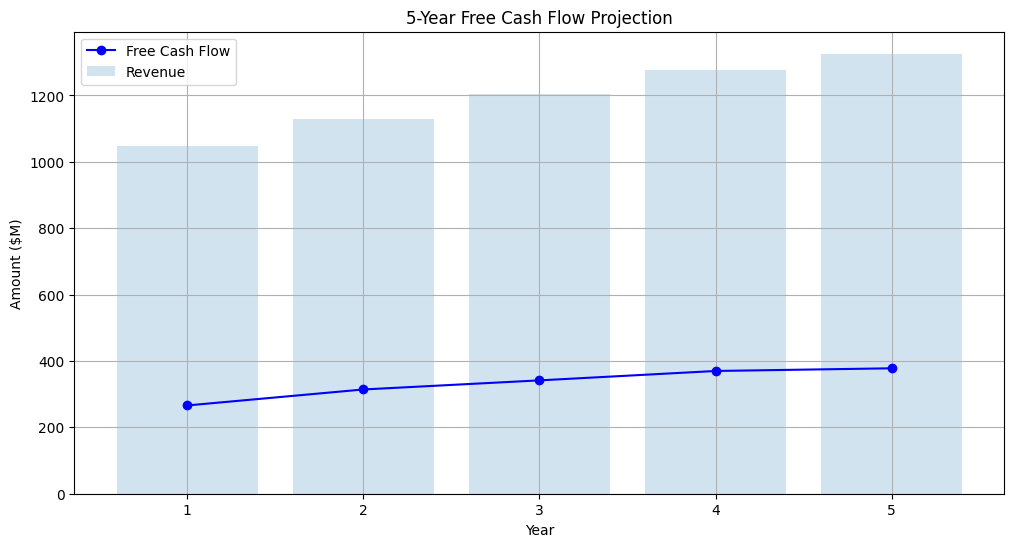


Sensitivity Analysis: Revenue Growth Impact on Year 5 FCF
   Growth_Rate  Year_5_FCF
0         0.03      295.40
1         0.04      340.53
2         0.05      387.43
3         0.06      436.15
4         0.07      486.75
5         0.08      539.27


In [4]:
#Forecasting Free cash Flows
"""
FCF = (Revenue - Costs - Depreciation) × (1 - Tax Rate) 
      + Depreciation 
      - Capital Expenditures 
      - Change in Net Working Capital
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation
def generate_sample_data(years=5, base_revenue=1000):
    np.random.seed(42)
    
    # Create DataFrame first
    df = pd.DataFrame({
        'Year': np.arange(1, years+1),
        'Revenue': base_revenue * (1 + np.random.uniform(0.03, 0.08, years)).cumprod(),
        'Costs': base_revenue * 0.6 * (1 + np.random.uniform(0.02, 0.05, years)).cumprod(),
        'Depreciation': base_revenue * 0.1 * (1 + np.random.uniform(0.01, 0.03, years)).cumprod(),
        'Capital_Expenditures': base_revenue * 0.08 * (1 + np.random.uniform(0.05, 0.1, years)).cumprod(),
        'Net_Working_Capital': base_revenue * 0.15 * (1 + np.random.uniform(-0.02, 0.03, years)).cumprod(),
        'Tax_Rate': 0.25
    })
    
    # Calculate change in NWC using DataFrame's diff()
    df['Change_NWC'] = df['Net_Working_Capital'].diff().fillna(0)
    
    return df

# FCF calculation function (using formula from screenshot)
def calculate_fcf(df):
    df['FCF'] = (
        (df['Revenue'] - df['Costs'] - df['Depreciation']) * (1 - df['Tax_Rate']) 
        + df['Depreciation'] 
        - df['Capital_Expenditures'] 
        - df['Change_NWC']
    )
    return df

# Generate and calculate sample data
financial_data = generate_sample_data()
financial_data = calculate_fcf(financial_data)

# Display results
print("Financial Projections with FCF Calculation:")
print(financial_data.round(2))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(financial_data['Year'], financial_data['FCF'], 'bo-', label='Free Cash Flow')
plt.bar(financial_data['Year'], financial_data['Revenue'], alpha=0.2, label='Revenue')
plt.title('5-Year Free Cash Flow Projection')
plt.xlabel('Year')
plt.ylabel('Amount ($M)')
plt.legend()
plt.grid(True)
plt.show()

# Sensitivity analysis on revenue growth
print("\nSensitivity Analysis: Revenue Growth Impact on Year 5 FCF")
growth_rates = np.linspace(0.03, 0.08, 6)
results = []

for rate in growth_rates:
    temp_data = generate_sample_data()
    temp_data['Revenue'] = temp_data['Revenue'].iloc[0] * (1 + rate) ** temp_data['Year']
    temp_data = calculate_fcf(temp_data)
    results.append((rate, temp_data['FCF'].iloc[-1]))
    
sensitivity_df = pd.DataFrame(results, columns=['Growth_Rate', 'Year_5_FCF'])
print(sensitivity_df.round(2))